Importing needed Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

Part A. Reading the Dataset File

In [2]:
df = pd.read_csv("Cancer.csv")
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


Part B. Spliting into trainning and testing sets

In [3]:
features = ["Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses"]
X = df[features]
y = df["Malignant_Cancer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

Part C. Predict using Decision Tree Classifier, obtain accuracy and AUC and show ROC Curve

In [4]:
#creating the decision tree
my_DecisionTree = DecisionTreeClassifier(random_state=2)
#training the decision tree
my_DecisionTree.fit(X_train, y_train)
#predict y using decision tree
y_predict_dt = my_DecisionTree.predict(X_test)
#obtain score for decision tree
dt_score = accuracy_score(y_test, y_predict_dt)
print ("Accuracy Score: " + str(dt_score))

Accuracy Score: 0.8666666666666667


In [5]:
y_predict_prob_dt = my_DecisionTree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)
AUC = auc(fpr, tpr)

Part D. Bagging Based on 29 Decision Trees and Use Voting to decide

Bagging

In [7]:
#Combining X_train and y_train because bootstrap_data will need the labels to train
training = pd.concat([X_train, y_train], axis=1)
prediction_results = [] #results of each prediction will go here

bootstrap_size = int(0.8 * X_train['Clump_Thickness'].count())


#for-loop to perform the bootstrapping
for i in range (0,29):
    bootstrap_data = resample(training, n_samples = bootstrap_size , random_state=i, replace = True) #obtaining the bootstrap data
    #separating the features with their labels for the bootstrap_data
    bs_X = bootstrap_data[features]
    bs_y = bootstrap_data['Malignant_Cancer']
    #creating and traininf a decision tree using the bootstrap_data and predicting using those results
    base_DecisionTree = DecisionTreeClassifier(random_state=2)
    base_DecisionTree.fit(bs_X, bs_y)
    base_y_predict = base_DecisionTree.predict(X_test)
    prediction_results.append(base_y_predict) #appending each prediction to the list of predictions


Voting

In [8]:
#Function to add the rows together
def getMaj(row):
    majority = 0
    for i in range(29):
        majority = majority + predict_df['Prediction_' + str(i)][row:row+1]
    return majority

In [58]:
#Creating a new data frame containing the results of each prediction
predict_df = pd.DataFrame()
for i in range (len(prediction_results)):
    predict_df['Prediction_' + str(i) ] = prediction_results[i]

rows = predict_df['Prediction_0'].count()
col = len(predict_df.columns)

#List to keep track of the majority value of each row
majority_res = []

#Obtaining the majority for each row
for i in range(rows):
    if int(getMaj(i)) > col/2:
        majority_res.append(1)
    else:
        majority_res.append(0)

#Adding the column in the prediction dataframe with all the majorities
predict_df['Majority'] = majority_res

#Calculating the score using the Majority obtained from voting
maj_score = accuracy_score(y_test, predict_df['Majority'])
print('Accuracy Score: ' + str(maj_score))

Accuracy Score: 0.9111111111111111


In [10]:
avg_predictions = pd.Series([])
for i in range(rows):
    avg = getMaj(i) / 45
    avg_predictions = avg_predictions.append(avg)

In [57]:
y_predict_prob_b = avg_predictions
fpr2, tpr2, threshold2s = roc_curve(y_test, y_predict_prob_b, pos_label=1)
AUC2 = auc(fpr2, tpr2)

Part E. Predict Using AdaBoost Classifier

In [22]:
#creating the ada boost
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
#training with the classifier
my_AdaBoost.fit(X_train, y_train)
#predicting the testing set
y_predict_ada = my_AdaBoost.predict(X_test)
#calculating the accuracy of the classifier
ada_score = accuracy_score(y_test, y_predict_ada)
#printing out the accuracy score
print("Accuracy Score: " + str(ada_score))

Accuracy Score: 0.9555555555555556


In [30]:
y_predict_prob_ada = my_AdaBoost.predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_predict_prob_ada[:,1], pos_label=1)
AUC3 = auc(fpr3, tpr3)
print('AUC: ' + str(AUC3))

AUC: 0.9653361344537815


Part F. Predicting Using XGBClassifier

In [20]:
#creating the XGBoost
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
#training with the classifier
my_XGBoost.fit(X_train, y_train)
#predicting the testing set
y_predict_xgb = my_XGBoost.predict(X_test)
#calculating the accuracy of the classifier
xgb_score = accuracy_score(y_test, y_predict_xgb)
#printing out the accuracy score
print("Accuracy Score: " + str(xgb_score))

Accuracy Score: 0.9555555555555556


D:\Users\j05h1\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
y_predict_prob_xgb = my_XGBoost.predict_proba(X_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_predict_prob_xgb[:,1], pos_label=1)
AUC4 = auc(fpr4, tpr4)
print('AUC: ' + str(AUC4))

AUC: 0.9621848739495799


Part G. Predicting Using Random Forest Classifier

In [34]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

#Training and Predicting using Random Forest
my_RandomForest.fit(X_train, y_train)
y_predict_rf = my_RandomForest.predict(X_test)

#calculating accuracy score of random forest
rf_score = accuracy_score(y_test, y_predict_rf)

#print random forest score
print("Accuracy Score: " + str(rf_score))

Random Forest Score: 0.9555555555555556


In [44]:
y_predict_prob_rf = my_RandomForest.predict_proba(X_test)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)
AUC5 = auc(fpr5, tpr5)
print('AUC: ' + str(AUC5))

AUC: 0.9516806722689075


Part H. Plot the ROC Curves for each Classifier used

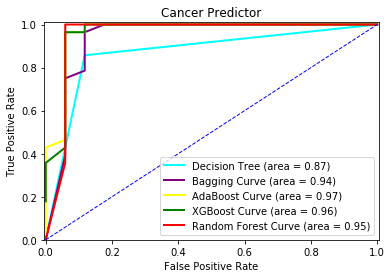

In [45]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='aqua', lw=2, 
         label='Decision Tree (area = %0.2f)' % AUC)

# Roc Curve:
plt.plot(fpr2, tpr2, color='purple', lw=2, 
         label='Bagging Curve (area = %0.2f)' % AUC2)

# Roc Curve:
plt.plot(fpr3, tpr3, color='yellow', lw=2, 
         label='AdaBoost Curve (area = %0.2f)' % AUC3)

# Roc Curve:
plt.plot(fpr4, tpr4, color='green', lw=2, 
         label='XGBoost Curve (area = %0.2f)' % AUC4)

# Roc Curve:
plt.plot(fpr5, tpr5, color='red', lw=2, 
         label='Random Forest Curve (area = %0.2f)' % AUC5)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cancer Predictor')
plt.legend(loc="lower right")

plt.show()

In [48]:
print ("Decision Tree Score: " + str(dt_score))
print ("Bagging/Voting Score: " + str(maj_score))
print ("AdaBoost Score: " + str(ada_score))
print ("XGBoost Score: " + str(xgb_score))
print ("Random Forest Score: " + str(rf_score))

Decision Tree Score: 0.8666666666666667
Bagging/Voting Score: 0.9111111111111111
AdaBoost Score: 0.9555555555555556
XGBoost Score: 0.9555555555555556
Random Forest Score: 0.9555555555555556


In [49]:
print ("Decision Tree AUC: " + str(AUC))
print ("Bagging/Voting AUC: " + str(AUC2))
print ("AdaBoost AUC: " + str(AUC3))
print ("XGBoost AUC: " + str(AUC4))
print ("Random Forest AUC: " + str(AUC5))

Decision Tree AUC: 0.8697478991596639
Bagging/Voting AUC: 0.9380252100840336
AdaBoost AUC: 0.9653361344537815
XGBoost AUC: 0.9621848739495799
Random Forest AUC: 0.9516806722689075


Which algorithm is the best w.r.t the AUC value? AdaBoost


Which algorithm is the best w.r.t the Accuracy value? Tie between AdaBoost, XGBoost, and Random Forest

Which algorithm is the best when we want a False Positive Rate of %7? Any except Decision Tree